# ***Experiment 3 (Function Name - TFIDF)***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Data Preprocessing***

In [2]:
import pandas as pd
path = '/content/drive/MyDrive/SCC/'

df_category = pd.read_csv(f'{path}data/collections_final.csv')
df_category.shape

(2406, 6)

In [3]:
contracts_with_transactions =  df_category['category'].unique()
contracts_with_transactions = contracts_with_transactions.tolist()
contracts_with_transactions

['arts', 'avatar', 'collectibles', 'memberships', 'games']

In [4]:
df_category['category'].value_counts()

category
avatar          601
arts            600
games           431
memberships     409
collectibles    365
Name: count, dtype: int64

In [5]:
days = 0
df_method = pd.read_csv(f'{path}data/raw_data_first_{days}_final.csv')
df_method.shape

(5321062, 7)

In [6]:
print("before merge ::: ", df_method.shape)
df_method = pd.merge(df_method, df_category, on=['contract_address'], how='inner')
print("after merge ::: ", df_method.shape)

before merge :::  (5321062, 7)
after merge :::  (5397819, 12)


In [7]:
df_method.head(2)

,contract_address,block_date,txn_hash,value,min_block_date,cutoff_block_date,method,url,collection,description,category,blockchain
0,0x099a16f0414cb0cc0555d5f1f8140166462d39ff,2021-10-01,BD2B0AA77BD47F6A9FEDC004CF17E3312112E114567E9E...,0.0,2021-10-01,2021-10-01,0xa22cb465,https://opensea.io/collection/unstackedtoadz,UnStackedToadz,The 1st stackable toads on the Ethereum blockc...,avatar,ethereum
1,0x099a16f0414cb0cc0555d5f1f8140166462d39ff,2021-10-01,94D6FD95DC45026998BA5BD804DC9113001340CEA279E0...,0.0,2021-10-01,2021-10-01,0xa22cb465,https://opensea.io/collection/unstackedtoadz,UnStackedToadz,The 1st stackable toads on the Ethereum blockc...,avatar,ethereum


In [8]:
contracts_with_transactions = set(df_method['contract_address'])
len(contracts_with_transactions)

2375

In [9]:
print(f"Lenght of contracts_with_transactions {len(contracts_with_transactions)}")
print()

print('df_category shape ::: ', df_category.shape)
df_category = df_category[df_category['contract_address'].isin(contracts_with_transactions)]
print('df_category shape ::: ', df_category.shape)
print()

print(df_category['category'].value_counts())

print()
categories_of_interest = list(set(df_category['category']))
print(f"categories_of_interest : {categories_of_interest}")

Lenght of contracts_with_transactions 2375

df_category shape :::  (2406, 6)
df_category shape :::  (2406, 6)

category
avatar          601
arts            600
games           431
memberships     409
collectibles    365
Name: count, dtype: int64

categories_of_interest : ['games', 'collectibles', 'memberships', 'arts', 'avatar']


In [10]:
print(df_category.shape,df_method.shape)

(2406, 6) (5397819, 12)


In [11]:
df_functions = pd.read_csv(f'{path}data/function_name.csv')
df_functions.shape

(2806, 4)

In [12]:
print()
df_txn = pd.merge(df_method, df_functions, on='method', how='left' )
df_txn.head(2)

,contract_address,block_date,txn_hash,value,min_block_date,cutoff_block_date,method,url,collection,description,category,blockchain,id,function,signature_type
0,0x099a16f0414cb0cc0555d5f1f8140166462d39ff,2021-10-01,BD2B0AA77BD47F6A9FEDC004CF17E3312112E114567E9E...,0.0,2021-10-01,2021-10-01,0xa22cb465,https://opensea.io/collection/unstackedtoadz,UnStackedToadz,The 1st stackable toads on the Ethereum blockc...,avatar,ethereum,29659.0,"setApprovalForAll(address,bool)",function_signature
1,0x099a16f0414cb0cc0555d5f1f8140166462d39ff,2021-10-01,BD2B0AA77BD47F6A9FEDC004CF17E3312112E114567E9E...,0.0,2021-10-01,2021-10-01,0xa22cb465,https://opensea.io/collection/unstackedtoadz,UnStackedToadz,The 1st stackable toads on the Ethereum blockc...,avatar,ethereum,841519.0,"niceFunctionHerePlzClick943230089(address,bool)",function_signature


In [13]:
print()
df_txn['function'] = df_txn['function'].apply(lambda x: str(x).split("(")[0])

In [14]:
df_txn.head(2)

,contract_address,block_date,txn_hash,value,min_block_date,cutoff_block_date,method,url,collection,description,category,blockchain,id,function,signature_type
0,0x099a16f0414cb0cc0555d5f1f8140166462d39ff,2021-10-01,BD2B0AA77BD47F6A9FEDC004CF17E3312112E114567E9E...,0.0,2021-10-01,2021-10-01,0xa22cb465,https://opensea.io/collection/unstackedtoadz,UnStackedToadz,The 1st stackable toads on the Ethereum blockc...,avatar,ethereum,29659.0,setApprovalForAll,function_signature
1,0x099a16f0414cb0cc0555d5f1f8140166462d39ff,2021-10-01,BD2B0AA77BD47F6A9FEDC004CF17E3312112E114567E9E...,0.0,2021-10-01,2021-10-01,0xa22cb465,https://opensea.io/collection/unstackedtoadz,UnStackedToadz,The 1st stackable toads on the Ethereum blockc...,avatar,ethereum,841519.0,niceFunctionHerePlzClick943230089,function_signature


In [15]:
df_method = df_txn

In [16]:
df_method.shape

(6709545, 15)

# ***Feature Engineering***

Raw Method

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

df_method['method'] = df_method['function'].str.lower()
df_method = df_method.groupby('contract_address').method.apply(list).reset_index()
print(df_method.shape)
print()
print(df_method.head(2))


df_method['method'] = df_method['method'].apply(lambda x: ' '.join(x))
df_method
print()
print(df_method.head(2))


tfidf = TfidfVectorizer(max_features=10000)
result = tfidf.fit_transform(df_method['method'])

df_feat_engg = pd.DataFrame(result.toarray())
print(df_feat_engg.head(2))

print()
print(len(list(tfidf.get_feature_names_out())))

df_feat_engg['contract_address'] = df_method['contract_address'].values

print()
df_feat_engg = pd.merge(df_feat_engg, df_category, on = 'contract_address', how='inner')
df_feat_engg.head(2)

print()
print(df_feat_engg.shape)

(2375, 2)

                             contract_address  \
0  0x00039fc9e54a042a0bdc85a0baf3a0274c3564dc   
1  0x0018ba792df599c6e0689dce908220978fd8cb57   

                                              method  
0  [flipsalestate, flipsalestate, safetransferfro...  
1  [setskill, setskill, setskill, setskill, setsk...  

                             contract_address  \
0  0x00039fc9e54a042a0bdc85a0baf3a0274c3564dc   
1  0x0018ba792df599c6e0689dce908220978fd8cb57   

                                              method  
0  flipsalestate flipsalestate safetransferfrom s...  
1  setskill setskill setskill setskill setskill s...  
   0     1     2     3     4     5     6     7     8     9     ...  2147  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   2148  2149  2150  2151  2152  2153  2154  2155  2156  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0

In [18]:
df_feat_engg.head(2)

,0,1,2,3,4,5,6,7,8,9,...,2153,2154,2155,2156,contract_address,url,collection,description,category,blockchain
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0x00039fc9e54a042a0bdc85a0baf3a0274c3564dc,NaN,The Million Dollar Punk Draw,The home of 150 tickets for The Million Dollar...,collectibles,ethereum
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0x0018ba792df599c6e0689dce908220978fd8cb57,NaN,EtherKingdoms,NaN,games,ethereum


# ***LightGBM***

In [19]:
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from lightgbm import early_stopping, log_evaluation
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score,accuracy_score
import pickle
import os

le = LabelEncoder()
df_feat_engg['category']= le.fit_transform(df_feat_engg['category'])

print(df_feat_engg.dtypes)

X = df_feat_engg.drop(labels=['collection', 'category','description','contract_address','url','blockchain'], axis=1)
y = df_feat_engg['category'].values.astype('int32')

param = {'objective': 'multiclass',
         'boosting': 'gbdt',
         'learning_rate': 0.1,
         'num_iterations': 5000,
         'min_data_in_leaf': 10,
         'bagging_fraction': 0.80,
         'bagging_freq': 5,
         'feature_fraction': 0.8,
         }

fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

metrics_list = []

for i, (train_index, test_index) in enumerate(fold.split(X, y)):
    print(i)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(len(X_train),len(X_test),len(y_train),len(y_test))

    model = LGBMClassifier(**param)

    es = early_stopping(stopping_rounds=200, first_metric_only= True)
    model = model.fit(X_train,y_train,
                    callbacks = [es, log_evaluation(100)],
                    eval_set = (X_test, y_test),
                    eval_metric = 'multiclass'
                    )
    print()
    print(f" model.classes_  : {model.classes_}")

    predict = model.predict_proba(X_test)
    print(predict.shape)

    X_test['predicted_class'] = [np.argmax(i) for i in predict]
    y_test_array = np.array(y_test)

    X_test['is_correct'] = np.where(y_test_array ==  X_test['predicted_class'], 1, 0)

    is_correct = X_test['is_correct'].sum()
    print(f"is_correct      : {X_test['is_correct'].sum()}")

    roc_auc = roc_auc_score(y_test_array, predict, average='macro', multi_class='ovr')
    acc = accuracy_score(y_test_array, X_test['predicted_class'])
    f1 = f1_score(y_test_array, X_test['predicted_class'], average='micro')
    recall = recall_score(y_test_array, X_test['predicted_class'], average='macro')
    precision = precision_score(y_test_array, X_test['predicted_class'], average='micro')

    print(f"roc_auc_score    : {roc_auc}")
    print(f"accuracy         : {acc}")
    print(f"f1_score         : {f1}")
    print(f"recall_score     : {recall}")
    print(f"precision_score  : {precision}")

    metrics_dict = {
        'tot_samples': len(y_test_array),
        'is_correct': is_correct,
        'roc_auc_score': roc_auc,
        'accuracy': acc,
        'f1_score': f1,
        'recall_score': recall,
        'precision_score': precision
    }

    # directory = "/dbfs/FileStore/SCCC/3_day_models"
    # if not os.path.exists(directory):
    #     os.makedirs(directory)

    metrics_list.append(metrics_dict)

    # file_path = f"{directory}/model_{i}.pkl"

    # if os.path.exists(file_path):
    #  os.remove(file_path)

    # with open(file_path, 'wb') as file:
    #     pickle.dump(model, file)


0              float64
1              float64
2              float64
3              float64
4              float64
                ...   
url             object
collection      object
description     object
category         int64
blockchain      object
Length: 2163, dtype: object
0
1924 482 1924 482
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3717
[LightGBM] [Info] Number of data points in the train set: 1924, number of used features: 101
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=2

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Start training from score -1.388895
[LightGBM] [Info] Start training from score -1.386814
[LightGBM] [Info] Start training from score -1.885927
[LightGBM] [Info] Start training from score -1.719137
[LightGBM] [Info] Start training from score -1.772721
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3709
[LightGBM] [Info] Number of data points in the train set: 1925, number of used features: 102
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=2

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 wil

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 wil

In [20]:
def plot_confusion_matrix(true, pred, labels):

    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(true, pred, normalize='true')

    import seaborn as sns; sns.set()
    import matplotlib.pyplot as plt

    cm_df = pd.DataFrame(confusion_matrix,
                 index = labels,
                 columns = labels)
    ax = sns.heatmap(cm_df, fmt = '.1%' , cmap="YlGnBu", cbar = False,  annot=True)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

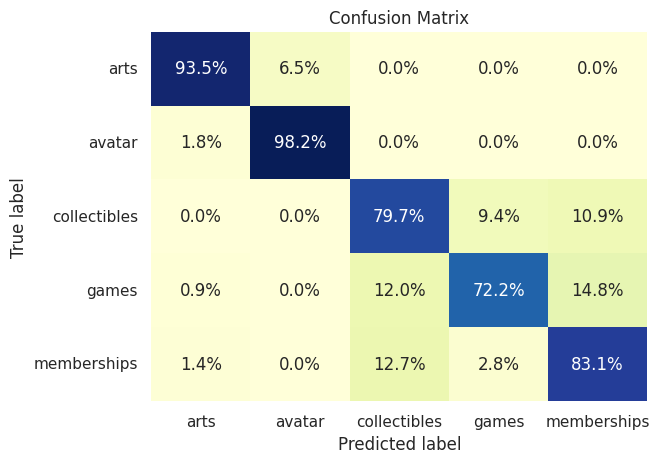

In [21]:
plot_confusion_matrix(X_test['predicted_class'],y_test_array, le.classes_)

In [22]:
results_lgbm = pd.DataFrame(metrics_list)
results_lgbm

,tot_samples,is_correct,roc_auc_score,accuracy,f1_score,recall_score,precision_score
0,482,424,0.985521,0.879668,0.879668,0.866166,0.879668
1,481,426,0.984823,0.885655,0.885655,0.867340,0.885655
2,481,419,0.983700,0.871102,0.871102,0.850497,0.871102
3,481,431,0.987687,0.896050,0.896050,0.882585,0.896050
4,481,416,0.980859,0.864865,0.864865,0.845024,0.864865


In [23]:
results_lgbm.to_csv(f'{path}results/exp-3-lgbm.csv',index = False)

# ***Random Forest***

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, accuracy_score

# Assuming df_feat_engg is your DataFrame
# Replace df_feat_engg with the name of your DataFrame

# Label encode the 'category' column
le = LabelEncoder()
df_feat_engg['category'] = le.fit_transform(df_feat_engg['category'])

# Drop irrelevant columns
X = df_feat_engg.drop(labels=['collection', 'category', 'description', 'contract_address', 'url', 'blockchain'], axis=1)
y = df_feat_engg['category'].values.astype('int32')

# Impute missing values in X with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

param = {
    'n_estimators': 100,  # Number of trees in the forest
    'max_depth': None,    # Maximum depth of the tree
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'auto',
    'bootstrap': True,
    'random_state': 42,
}

fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

metrics_list = []

for i, (train_index, test_index) in enumerate(fold.split(X_imputed, y)):
    print(i)
    X_train, X_test = X_imputed[train_index], X_imputed[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(len(X_train), len(X_test), len(y_train), len(y_test))

    model = RandomForestClassifier(**param)
    model.fit(X_train, y_train)

    predict = model.predict_proba(X_test)
    print(predict.shape)

    predicted_class = np.argmax(predict, axis=1)

    is_correct = np.sum(predicted_class == y_test)

    roc_auc = roc_auc_score(y_test, predict, average='macro', multi_class='ovr')
    acc = accuracy_score(y_test, predicted_class)
    f1 = f1_score(y_test, predicted_class, average='micro')
    recall = recall_score(y_test, predicted_class, average='macro')
    precision = precision_score(y_test, predicted_class, average='micro')

    print(f"roc_auc_score    : {roc_auc}")
    print(f"is_correct       : {is_correct}")
    print(f"accuracy         : {acc}")
    print(f"f1_score         : {f1}")
    print(f"recall_score     : {recall}")
    print(f"precision_score  : {precision}")

    metrics_dict = {
        'tot_samples': len(y_test_array),
        'is_correct': is_correct,
        'roc_auc_score': roc_auc,
        'accuracy': acc,
        'f1_score': f1,
        'recall_score': recall,
        'precision_score': precision
    }

    metrics_list.append(metrics_dict)


0
1924 482 1924 482


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


(482, 5)
roc_auc_score    : 0.9792065865090895
is_correct       : 410
accuracy         : 0.8506224066390041
f1_score         : 0.8506224066390041
recall_score     : 0.8381728872681622
precision_score  : 0.8506224066390041
1
1925 481 1925 481


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


(481, 5)
roc_auc_score    : 0.9856988653967127
is_correct       : 438
accuracy         : 0.9106029106029107
f1_score         : 0.9106029106029107
recall_score     : 0.8975828095012393
precision_score  : 0.9106029106029107
2
1925 481 1925 481


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


(481, 5)
roc_auc_score    : 0.9821257832337651
is_correct       : 417
accuracy         : 0.8669438669438669
f1_score         : 0.866943866943867
recall_score     : 0.849911939227707
precision_score  : 0.8669438669438669
3
1925 481 1925 481


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


(481, 5)
roc_auc_score    : 0.9860069813634933
is_correct       : 424
accuracy         : 0.8814968814968815
f1_score         : 0.8814968814968815
recall_score     : 0.8689960424452924
precision_score  : 0.8814968814968815
4
1925 481 1925 481


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


(481, 5)
roc_auc_score    : 0.9822260571208943
is_correct       : 422
accuracy         : 0.8773388773388774
f1_score         : 0.8773388773388774
recall_score     : 0.8637434763802879
precision_score  : 0.8773388773388774


In [25]:
results_rf = pd.DataFrame(metrics_list)
results_rf

,tot_samples,is_correct,roc_auc_score,accuracy,f1_score,recall_score,precision_score
0,481,410,0.979207,0.850622,0.850622,0.838173,0.850622
1,481,438,0.985699,0.910603,0.910603,0.897583,0.910603
2,481,417,0.982126,0.866944,0.866944,0.849912,0.866944
3,481,424,0.986007,0.881497,0.881497,0.868996,0.881497
4,481,422,0.982226,0.877339,0.877339,0.863743,0.877339


In [26]:
results_rf.to_csv(f'{path}results/exp-3-rf.csv',index = False)

# ***XGBoost***

In [27]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, accuracy_score

le = LabelEncoder()
df_feat_engg['category'] = le.fit_transform(df_feat_engg['category'])

print(df_feat_engg.dtypes)

X = df_feat_engg.drop(labels=['collection', 'category','description','contract_address','url','blockchain'], axis=1)
y = df_feat_engg['category'].values.astype('int32')

param = {'objective': 'multi:softmax',
         'num_class': len(np.unique(y)),  # Number of classes
         'learning_rate': 0.1,
         'n_estimators': 5000,
         'min_child_weight': 1,
         'gamma': 0,
         'subsample': 0.8,
         'colsample_bytree': 0.8,
         'eval_metric': 'mlogloss',  # Multi-class log loss
         'verbosity': 0
         }

fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

metrics_list = []

for i, (train_index, test_index) in enumerate(fold.split(X, y)):
    print(i)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(len(X_train), len(X_test), len(y_train), len(y_test))

    model = XGBClassifier(**param)

    model = model.fit(X_train, y_train,
                      early_stopping_rounds=200,
                      eval_set=[(X_test, y_test)],
                      verbose=100)

    predict = model.predict_proba(X_test)
    print(predict.shape)

    # You may need to adjust the following lines based on the output structure of XGBoost
    X_test['predicted_class'] = [np.argmax(i) for i in predict]
    y_test_array = np.array(y_test)

    X_test['is_correct'] = np.where(y_test_array ==  X_test['predicted_class'], 1, 0)

    is_correct = X_test['is_correct'].sum()
    print(f"is_correct      : {X_test['is_correct'].sum()}")

    roc_auc = roc_auc_score(y_test_array, predict, average='macro', multi_class='ovr')
    acc = accuracy_score(y_test_array, X_test['predicted_class'])
    f1 = f1_score(y_test_array, X_test['predicted_class'], average='micro')
    recall = recall_score(y_test_array, X_test['predicted_class'], average='micro')
    precision = precision_score(y_test_array, X_test['predicted_class'], average='micro')

    print(f"roc_auc_score    : {roc_auc}")
    print(f"accuracy         : {acc}")
    print(f"f1_score         : {f1}")
    print(f"recall_score     : {recall}")
    print(f"precision_score  : {precision}")

    metrics_dict = {
        'tot_samples': len(y_test_array),
        'is_correct': is_correct,
        'roc_auc_score': roc_auc,
        'accuracy': acc,
        'f1_score': f1,
        'recall_score': recall,
        'precision_score': precision
    }

    metrics_list.append(metrics_dict)


0              float64
1              float64
2              float64
3              float64
4              float64
                ...   
url             object
collection      object
description     object
category         int64
blockchain      object
Length: 2163, dtype: object
0
1924 482 1924 482


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.45481
[100]	validation_0-mlogloss:0.30394
[200]	validation_0-mlogloss:0.31433
[300]	validation_0-mlogloss:0.32295
[308]	validation_0-mlogloss:0.32383
(482, 5)
is_correct      : 424
roc_auc_score    : 0.9857075694649813
accuracy         : 0.8796680497925311
f1_score         : 0.8796680497925311
recall_score     : 0.8796680497925311
precision_score  : 0.8796680497925311
1
1925 481 1925 481


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.45703
[100]	validation_0-mlogloss:0.25187
[200]	validation_0-mlogloss:0.26532
[290]	validation_0-mlogloss:0.27893
(481, 5)
is_correct      : 426
roc_auc_score    : 0.9867473505514208
accuracy         : 0.8856548856548857
f1_score         : 0.8856548856548857
recall_score     : 0.8856548856548857
precision_score  : 0.8856548856548857
2
1925 481 1925 481


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.45490
[100]	validation_0-mlogloss:0.27806
[200]	validation_0-mlogloss:0.27589
[300]	validation_0-mlogloss:0.28592
[356]	validation_0-mlogloss:0.29052
(481, 5)
is_correct      : 427
roc_auc_score    : 0.9855904342331735
accuracy         : 0.8877338877338877
f1_score         : 0.8877338877338877
recall_score     : 0.8877338877338877
precision_score  : 0.8877338877338877
3
1925 481 1925 481


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.45664
[100]	validation_0-mlogloss:0.27067
[200]	validation_0-mlogloss:0.27082
[300]	validation_0-mlogloss:0.27892
[333]	validation_0-mlogloss:0.28220
(481, 5)
is_correct      : 430
roc_auc_score    : 0.9891224281806139
accuracy         : 0.893970893970894
f1_score         : 0.8939708939708941
recall_score     : 0.893970893970894
precision_score  : 0.893970893970894
4
1925 481 1925 481


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.45467
[100]	validation_0-mlogloss:0.30698
[200]	validation_0-mlogloss:0.32970
[287]	validation_0-mlogloss:0.34547
(481, 5)
is_correct      : 419
roc_auc_score    : 0.9829258914800938
accuracy         : 0.8711018711018711
f1_score         : 0.8711018711018711
recall_score     : 0.8711018711018711
precision_score  : 0.8711018711018711


In [28]:
results_xgboost = pd.DataFrame(metrics_list)
results_xgboost

,tot_samples,is_correct,roc_auc_score,accuracy,f1_score,recall_score,precision_score
0,482,424,0.985708,0.879668,0.879668,0.879668,0.879668
1,481,426,0.986747,0.885655,0.885655,0.885655,0.885655
2,481,427,0.985590,0.887734,0.887734,0.887734,0.887734
3,481,430,0.989122,0.893971,0.893971,0.893971,0.893971
4,481,419,0.982926,0.871102,0.871102,0.871102,0.871102


In [29]:
results_xgboost.to_csv(f'{path}results/exp-3-xgboost.csv',index = False)

# ***Result***

In [ ]:
results_lgbm

,tot_samples,is_correct,roc_auc_score,accuracy,f1_score,recall_score,precision_score
0,482,424,0.985521,0.879668,0.879668,0.879668,0.879668
1,481,426,0.984823,0.885655,0.885655,0.885655,0.885655
2,481,419,0.983700,0.871102,0.871102,0.871102,0.871102
3,481,431,0.987687,0.896050,0.896050,0.896050,0.896050
4,481,416,0.980859,0.864865,0.864865,0.864865,0.864865


In [ ]:
results_rf

,tot_samples,is_correct,roc_auc_score,accuracy,f1_score,recall_score,precision_score
0,481,410,0.979207,0.850622,0.850622,0.850622,0.850622
1,481,438,0.985699,0.910603,0.910603,0.910603,0.910603
2,481,417,0.982126,0.866944,0.866944,0.866944,0.866944
3,481,424,0.986007,0.881497,0.881497,0.881497,0.881497
4,481,422,0.982226,0.877339,0.877339,0.877339,0.877339


In [ ]:
results_xgboost

,tot_samples,is_correct,roc_auc_score,accuracy,f1_score,recall_score,precision_score
0,482,424,0.985708,0.879668,0.879668,0.879668,0.879668
1,481,426,0.986747,0.885655,0.885655,0.885655,0.885655
2,481,427,0.985590,0.887734,0.887734,0.887734,0.887734
3,481,430,0.989122,0.893971,0.893971,0.893971,0.893971
4,481,419,0.982926,0.871102,0.871102,0.871102,0.871102
